In [1]:
import json

In [2]:
import pandas as pd

In [3]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [4]:
from helpers import *

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [7]:
with open('lyrics.json') as f:
    all_lyrics = json.load(f)
print(all_lyrics)

{'cardigan': ['vintage', 'tee', 'brand', 'new', 'phone', 'high', 'heels', 'on', 'cobblestones', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'sequined', 'smile', 'black', 'lipstick', 'sensual', 'politics', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'i', 'knew', 'you', "dancin'", 'in', 'your', "levi's", 'drunk', 'under', 'a', 'streetlight', 'i', 'i', 'knew', 'you', 'hand', 'under', 'my', 'sweatshirt', 'baby', 'kiss', 'it', 'better', 'i', 'and', 'when', 'i', 'felt', 'like', 'i', 'was', 'an', 'old', 'cardigan', 'under', "someone's", 'bed', 'you', 'put', 'me', 'on', 'and', 'said', 'i', 'was', 'your', 'favorite', 'a', 'friend', 'to', 'all', 'is', 'a', 'friend', 'to', 'none', 'chase', 'two', 'girls', 'lose', 'the', 'one', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'i', 'knew', 'you', 'playing', 'hide-and-seek', 'and', 'giving', 'me', 'your', 'weekends', 'i', 'i', 'knew', 'you', 'your',

In [8]:
corpus = {}
for song, lyrics in all_lyrics.items():
    detokenized_lyrics = TreebankWordDetokenizer().detokenize(lyrics)
#     print(detokenized_lyrics)
    corpus[song] = [detokenized_lyrics]
print(corpus)

{'cardigan': ["vintage tee brand new phone high heels on cobblestones when you are young they assume you know nothing sequined smile black lipstick sensual politics when you are young they assume you know nothing but i knew you dancin' in your levi's drunk under a streetlight i i knew you hand under my sweatshirt baby kiss it better i and when i felt like i was an old cardigan under someone's bed you put me on and said i was your favorite a friend to all is a friend to none chase two girls lose the one when you are young they assume you know nothing but i knew you playing hide-and-seek and giving me your weekends i i knew you your heartbeat on the high line once in twenty lifetimes i and when i felt like i was an old cardigan under someone's bed you put me on and said i was your favorite to kiss in cars and downtown bars was all we needed you drew stars around my scars but now i'm bleedin' 'cause i knew you steppin' on the last train marked me like a bloodstain i i knew you tried to ch

In [9]:
df = pd.DataFrame(data=corpus)

In [ ]:
df.to_csv('input.csv',index=False)

In [10]:
df.head(10)

,cardigan,exile,lover,the 1,look what you made me do,betty,end game,me!,you need to calm down,august,...,santa baby,today was a fairytale,wait for me,permanent marker,we were happy,i did something bad (reputation tour remix),american boy,teardrops on my guitar (pop version),silent night,angelina
0,vintage tee brand new phone high heels on cobb...,i can see you standing honey with his arms aro...,we could leave the christmas lights up 'til ja...,i'm doing good i'm on some new shit been sayin...,i don't like your little games don't like your...,betty i won't make assumptions about why you s...,i wanna be your end game i wanna be your first...,i promise that you'll never find another like ...,you are somebody that i don't know but you're ...,salt air and the rust on your door i never nee...,...,santa baby slip a sable under the tree for me ...,today was a fairytale you were the prince i us...,if you had only gotten to me first if i could ...,i know he loved you a long time ago i ain't je...,we used to walk along the street when the porc...,i never trust a narcissist but they love me so...,american boy living life as it goes sittin' on...,drew looks at me i fake a smile so he won't se...,silent night holy night all is calm and all is...,angelina s got a pretty face and really long b...


In [11]:
new_df = df.T.rename(columns={0: "lyrics"})

In [12]:
new_df

,lyrics
cardigan,vintage tee brand new phone high heels on cobb...
exile,i can see you standing honey with his arms aro...
lover,we could leave the christmas lights up 'til ja...
the 1,i'm doing good i'm on some new shit been sayin...
look what you made me do,i don't like your little games don't like your...
...,...
i did something bad (reputation tour remix),i never trust a narcissist but they love me so...
american boy,american boy living life as it goes sittin' on...
teardrops on my guitar (pop version),drew looks at me i fake a smile so he won't se...
silent night,silent night holy night all is calm and all is...


In [ ]:
pd.read_csv('input.csv', header=None).T.to_csv('lyrics.csv', header=["song", "lyrics"], index=False)

In [13]:
def find_unique(list_of_words):
    unique_list = []
    for word in list_of_words:
        if word not in unique_list:
            unique_list.append(word)
    return unique_list

In [14]:
words = []
# df = df.reset_index(drop=True)
for word in new_df['lyrics'].tolist():
    words.append(find_unique(lyrics_to_words(word).split()))

In [15]:
new_df['words'] = words
new_df.head()

,lyrics,words
cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ..."
exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug..."
lover,we could leave the christmas lights up 'til ja...,"[could, leave, christmas, light, til, january,..."
the 1,i'm doing good i'm on some new shit been sayin...,"[im, good, new, shit, saying, yes, instead, no..."
look what you made me do,i don't like your little games don't like your...,"[like, little, game, tilted, stage, role, made..."


In [ ]:
new_df.to_csv('lyrics_words.csv')

In [16]:
with open("good_song_and_album_names.json") as f:
    song_and_album_names = json.load(f)
print(song_and_album_names)

{'new_song_album_list': [{'song': 'cardigan', 'album': 'folklore'}, {'song': 'exile', 'album': 'folklore'}, {'song': 'Lover', 'album': 'Lover'}, {'song': 'the 1', 'album': 'folklore'}, {'song': 'Look What You Made Me Do', 'album': 'reputation'}, {'song': 'betty', 'album': 'folklore'}, {'song': 'End Game', 'album': 'reputation'}, {'song': 'ME!', 'album': 'Lover'}, {'song': 'You Need To Calm Down', 'album': 'Lover'}, {'song': 'august', 'album': 'folklore'}, {'song': '...Ready for It?', 'album': 'reputation'}, {'song': 'Blank Space', 'album': '1989'}, {'song': 'my tears ricochet', 'album': 'folklore'}, {'song': 'willow', 'album': 'evermore'}, {'song': 'champagne problems', 'album': 'evermore'}, {'song': 'invisible string', 'album': 'folklore'}, {'song': 'the last great american dynasty', 'album': 'folklore'}, {'song': 'Delicate', 'album': 'reputation'}, {'song': 'Call It What You Want', 'album': 'reputation'}, {'song': 'Cruel Summer', 'album': 'Lover'}, {'song': 'Bad Blood (Remix)', 'albu

In [17]:
for i in new_df.index:
    print(i)

cardigan
exile
lover
the 1
look what you made me do
betty
end game
me!
you need to calm down
august
...ready for it?
blank space
my tears ricochet
willow
champagne problems
invisible string
the last great american dynasty
delicate
call it what you want
cruel summer
bad blood (remix)
i dont wanna live forever
style
seven
illicit affairs
this is me trying
gorgeous
evermore
peace
mad woman
the man
mirrorball
dont blame me
i did something bad
dress
hoax
love story
happiness
getaway car
no body, no crime
epiphany
the archer
gold rush
bad blood
tolerate it
london boy
cornelia street
all too well
wildest dreams
daylight
king of my heart
tis the damn season
ivy
death by a thousand cuts
the lakes
paper rings
so it goes...
this is why we cant have nice things
false god
i think he knows
dancing with our hands tied
coney island
afterglow
dorothea
soon youll get better
cowboy like me
marjorie
clean
shake it off
out of the woods
you belong with me
its nice to have a friend
closure
i knew you were tr

In [42]:
albums = ['taylor swift', 'fearless', 'speak now', 'red (deluxe edition)', '1989', 'reputation', 'lover', 'folklore', 'evermore']
song_album_dic = {}
for sa in song_and_album_names['new_song_album_list']:
    if sa['album'].lower() in albums:
    ## remove i did something bad rep tour and teardrops pop version
       song_album_dic[sa['song'].lower()] = sa['album'].lower()
    else:
        pass
print(song_album_dic)
song_album_dic['lover'] = 'lover'
song_album_dic['look what you made me do'] = 'reputation'
song_album_dic['the lakes'] = 'folklore'
song_album_dic['shake it off'] = '1989'
song_album_dic['you belong with me'] = 'fearless'
song_album_dic['right where you left me'] = 'evermore'
song_album_dic['new romantics'] = '1989'
song_album_dic['its time to go'] = 'evermore'
song_album_dic['you are in love'] = '1989'
song_album_dic['wonderland'] = '1989'
song_album_dic['enchanted'] = 'speak now'
song_album_dic['mine'] = 'speak now'
song_album_dic['picture to burn'] = 'taylor swift'
song_album_dic['ours'] = 'speak now'
song_album_dic['if this was a movie'] = 'speak now'
song_album_dic['cold as you'] = 'taylor swift'
song_album_dic['tied together with a smile'] = 'taylor swift'
song_album_dic['superman'] = 'speak now'
song_album_dic['jump then fall'] = 'fearless'
song_album_dic['im only me when im with you'] = 'taylor swift'
song_album_dic['the other side of the door'] = 'fearless'
song_album_dic['come in with the rain'] = 'fearless'
song_album_dic['you all over me'] = 'fearless'
song_album_dic['superstar'] = 'fearless'
song_album_dic['i heart ?'] = 'taylor swift'
song_album_dic['today was a fairytale'] = 'fearless'
song_album_dic['we were happy'] = 'fearless'
new_df['album'] = [song_album_dic[song_name] if song_name in song_album_dic else "Other" for song_name in new_df.index]

{'cardigan': 'folklore', 'exile': 'folklore', 'lover': 'lover', 'the 1': 'folklore', 'look what you made me do': 'reputation', 'betty': 'folklore', 'end game': 'reputation', 'me!': 'lover', 'you need to calm down': 'lover', 'august': 'folklore', '...ready for it?': 'reputation', 'blank space': '1989', 'my tears ricochet': 'folklore', 'willow': 'evermore', 'champagne problems': 'evermore', 'invisible string': 'folklore', 'the last great american dynasty': 'folklore', 'delicate': 'reputation', 'call it what you want': 'reputation', 'cruel summer': 'lover', 'style': '1989', 'seven': 'folklore', 'illicit affairs': 'folklore', 'this is me trying': 'folklore', 'gorgeous': 'reputation', 'evermore': 'evermore', 'peace': 'folklore', 'mad woman': 'folklore', 'the man': 'lover', 'mirrorball': 'folklore', 'dont blame me': 'reputation', 'i did something bad': 'reputation', 'dress': 'reputation', 'hoax': 'folklore', 'love story': 'fearless', 'happiness': 'evermore', 'getaway car': 'reputation', 'no 

In [47]:
new_df

,lyrics,words,album
cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore
exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore
lover,we could leave the christmas lights up 'til ja...,"[could, leave, christmas, light, til, january,...",lover
the 1,i'm doing good i'm on some new shit been sayin...,"[im, good, new, shit, saying, yes, instead, no...",folklore
look what you made me do,i don't like your little games don't like your...,"[like, little, game, tilted, stage, role, made...",reputation
...,...,...,...
fearless [liner notes],there's somethin' 'bout the way the street loo...,"[there, somethin, bout, way, street, look, rai...",fearless
i heart ?,wish i had concentrated they said love was com...,"[wish, concentrated, said, love, complicated, ...",taylor swift
today was a fairytale,today was a fairytale you were the prince i us...,"[today, fairytale, prince, used, damsel, distr...",fearless
we were happy,we used to walk along the street when the porc...,"[used, walk, along, street, porch, light, shin...",fearless


In [48]:
new_df.to_csv('lyrics_words_albums.csv')

In [45]:
indices_to_delete = new_df[new_df['album'] == 'Other'].index

In [46]:
new_df.drop(indices_to_delete, inplace = True)

In [49]:
indexed_df = new_df.reset_index()

In [57]:
indexed_df

,index,lyrics,words,album
0,cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore
1,exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore
2,lover,we could leave the christmas lights up 'til ja...,"[could, leave, christmas, light, til, january,...",lover
3,the 1,i'm doing good i'm on some new shit been sayin...,"[im, good, new, shit, saying, yes, instead, no...",folklore
4,look what you made me do,i don't like your little games don't like your...,"[like, little, game, tilted, stage, role, made...",reputation
...,...,...,...,...
144,superstar,this is wrong but i can t help but feel like t...,"[wrong, help, feel, like, nothing, right, babe...",fearless
145,a perfectly good heart,[chorus 1:] why would you wanna break a perfec...,"[chorus, 1, would, wanna, break, perfectly, go...",taylor swift
146,i heart ?,wish i had concentrated they said love was com...,"[wish, concentrated, said, love, complicated, ...",taylor swift
147,today was a fairytale,today was a fairytale you were the prince i us...,"[today, fairytale, prince, used, damsel, distr...",fearless


In [53]:
indexed_df.drop([123, 139, 148, 152], inplace = True)

In [56]:
indexed_df.reset_index(drop = True, inplace = True)

In [58]:
indexed_df.to_csv('indexed_df.csv')

In [59]:
set_words = []
set_albums = []

for i in indexed_df.index:
    for word in indexed_df['words'].iloc[i]:
        set_words.append(word)
        set_albums.append(indexed_df['album'].iloc[i])

In [60]:
words_albums_df = pd.DataFrame({'words': set_words, 'album': set_albums})

In [61]:
stopwords = ["n't", "oh", "ooh", "ai", "oooh", "wo", "mmmm", "mmmmmmm", "lyrics", "chorus", "written", "taylor", "repeat", "s", "ta", "la", "ve", "ll", "wan", "na", "ca", "re", "d", "m", "gon", "ah"]

In [62]:
cv = CountVectorizer(stop_words=stopwords)

In [63]:
text_cv = cv.fit_transform(words_albums_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['album'] = words_albums_df['album']

In [64]:
vect_words = data_cv.groupby('album').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

In [68]:
vect_words.to_csv('words_albums.csv',index=False)

In [67]:
vect_words

,words,taylor swift,fearless,speak now,red (deluxe edition),1989,reputation,lover,folklore,evermore
0,10,0,0,0,0,1,0,0,0,0
1,14,0,0,1,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,1
3,158,0,0,1,0,0,0,0,0,0
4,16th,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2899,york,0,0,0,1,1,0,2,1,0
2900,you,1,1,0,2,0,1,0,0,0
2901,young,0,1,1,1,3,1,0,1,1
2902,younger,0,0,0,0,0,1,0,0,1


In [66]:
vect_words = vect_words[['words', 'taylor swift', 'fearless', 'speak now', 'red (deluxe edition)', '1989', 'reputation', 'lover', 'folklore', 'evermore']]

In [69]:
def calc_words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_songs = []
    albums = []
    
    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        albums.append(str(value))
        total_songs.append(main_df['album'][main_df['album']==value].count())
    
    data = pd.DataFrame({'album':albums,'unique words':unique_words,'total words':total_words,'total songs':total_songs})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [70]:
words_stats = calc_words_stats(vect_words,indexed_df)

In [71]:
words_stats

,album,unique words,total words,total songs,words per songs
0,taylor swift,537,993,15,66
1,fearless,783,1633,20,82
2,speak now,869,1644,17,97
3,red (deluxe edition),733,1358,18,75
4,1989,654,1155,16,72
5,reputation,733,1214,14,87
6,lover,776,1294,16,81
7,folklore,902,1382,17,81
8,evermore,886,1423,16,89


In [72]:
words_stats.to_csv('words_stats.csv')

In [77]:
def plot_freq_words(df, album, n_words):
    top_words = df.sort_values([album],ascending=False).head(n_words)
    
    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words['words'],top_words[df.columns[1]])
    plt.plot(top_words['words'],top_words[df.columns[2]])
    plt.plot(top_words['words'],top_words[df.columns[3]])
    plt.plot(top_words['words'],top_words[df.columns[4]])
    plt.plot(top_words['words'],top_words[df.columns[5]])
    plt.plot(top_words['words'],top_words[df.columns[6]])
    plt.plot(top_words['words'],top_words[df.columns[7]])
    plt.plot(top_words['words'],top_words[df.columns[8]])
    plt.plot(top_words['words'],top_words[df.columns[9]])
    
    plt.legend(df.columns[1:].tolist())
    plt.title(f"Most Frequently Used Words in {album} Compared with Other Albums",fontsize=14)
    plt.xlabel(f'Most Frequently Used Words in {album}',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    
    filename = album + "_lineplot.png"
    plt.savefig(filename,format="png", bbox_inches='tight')
    plt.show()

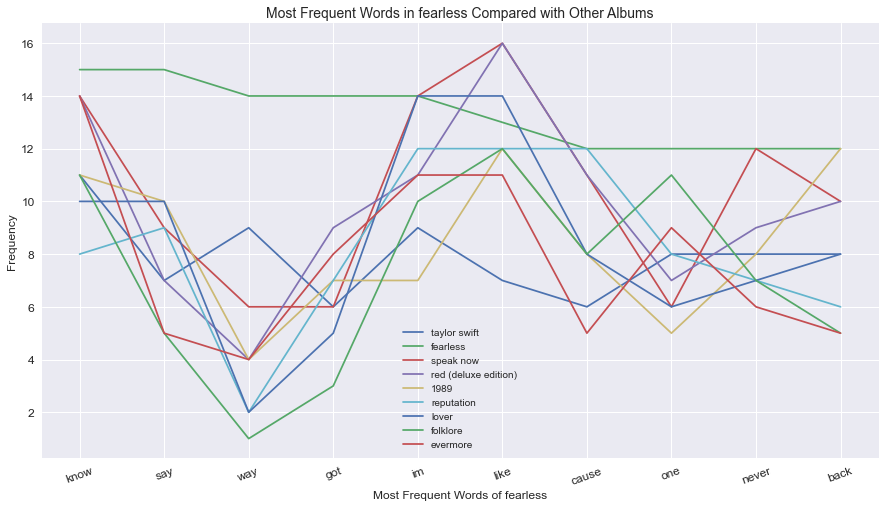

In [76]:
plot_freq_words(vect_words, 'fearless', 10)

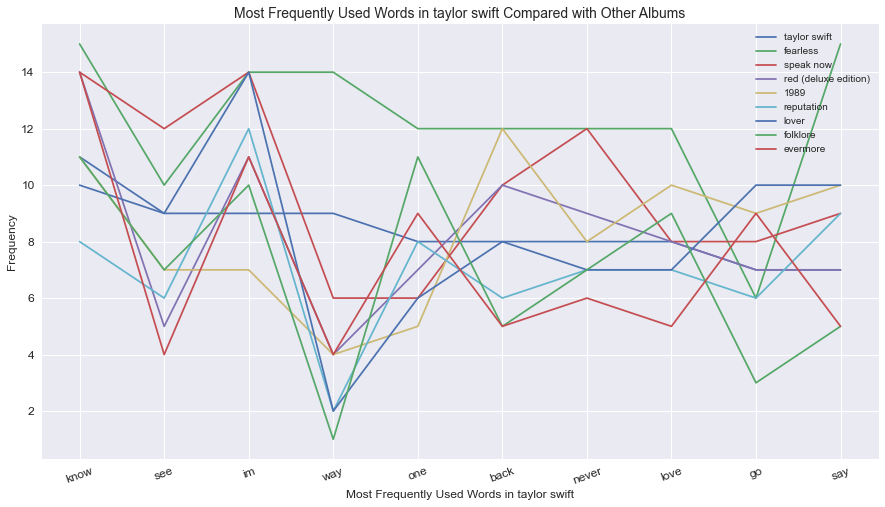

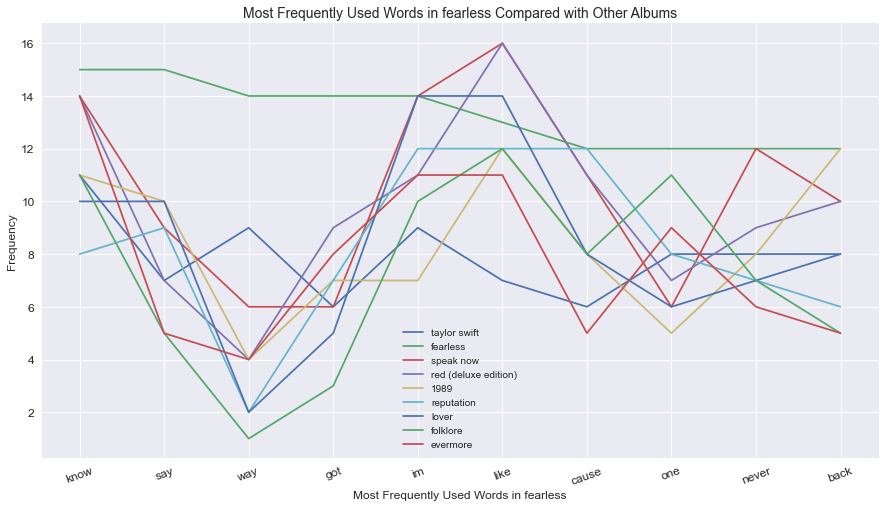

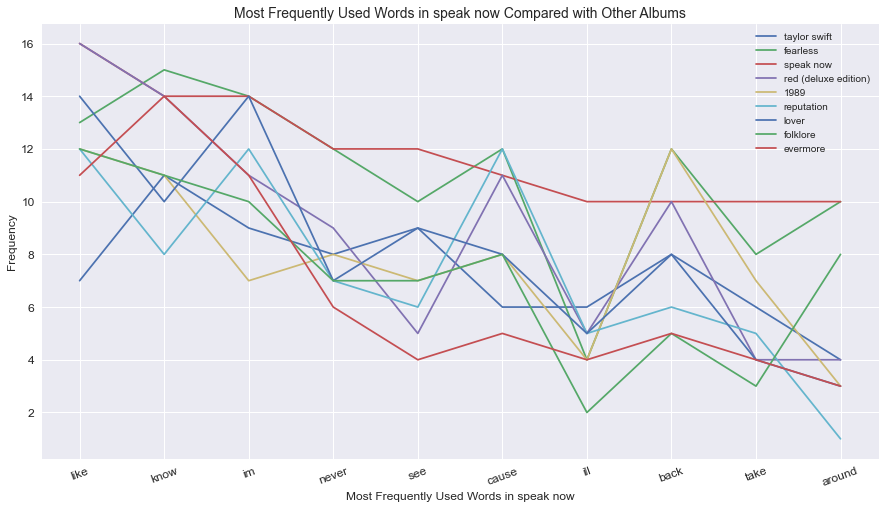

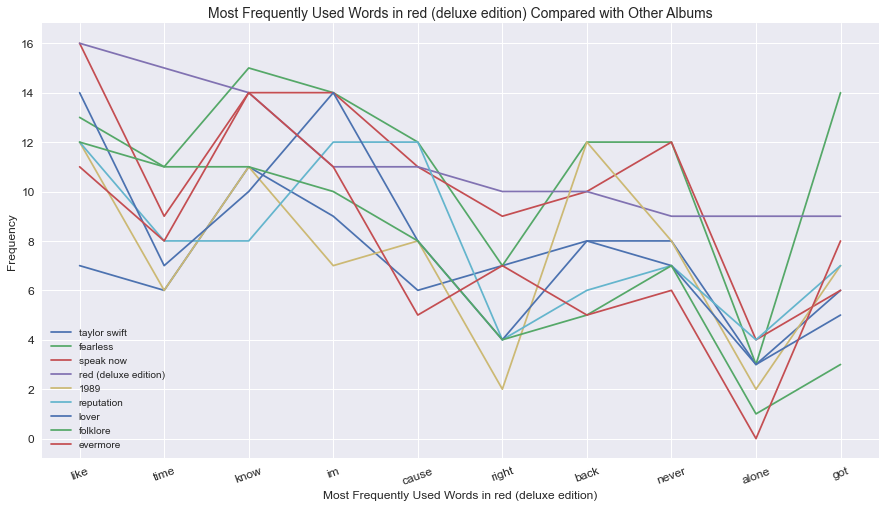

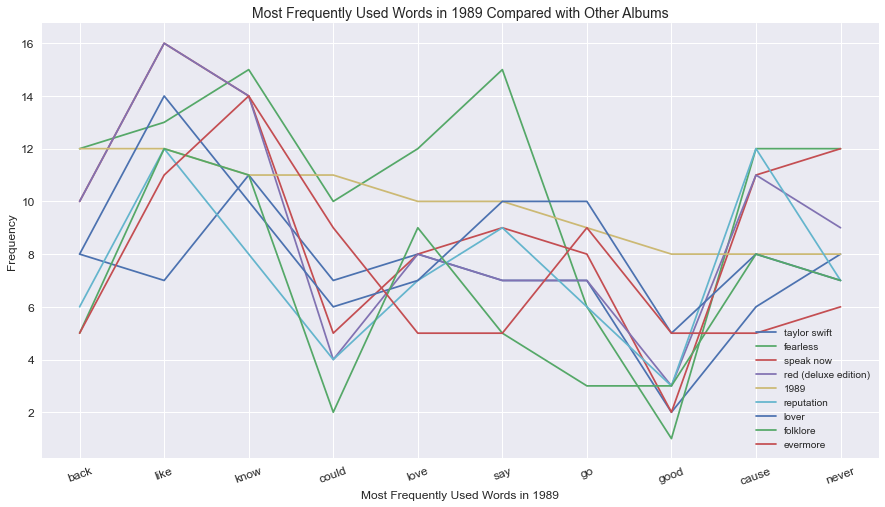

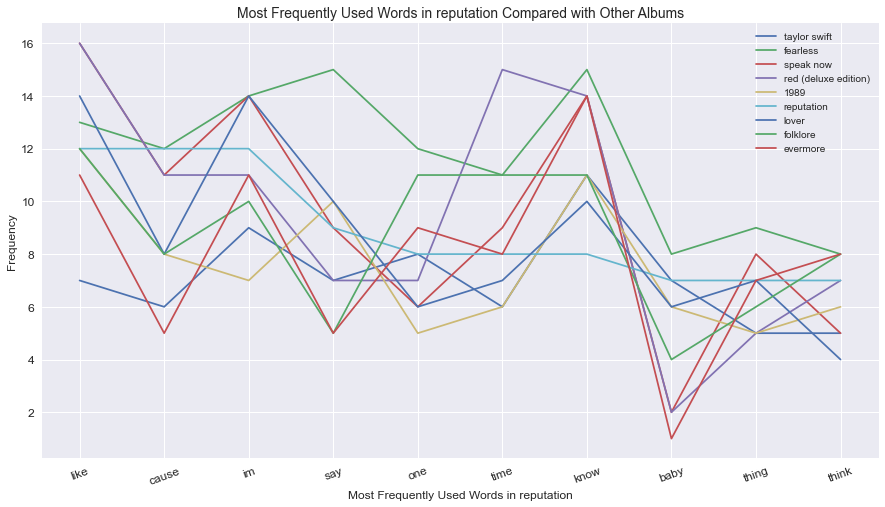

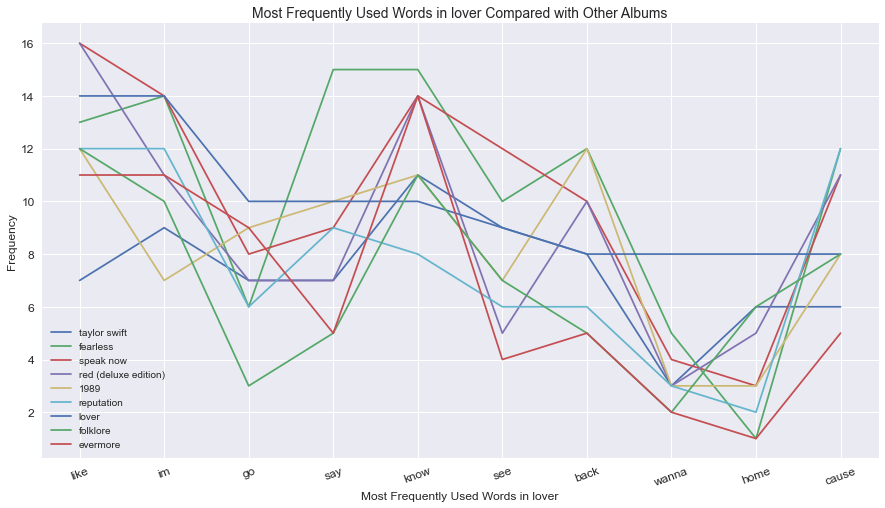

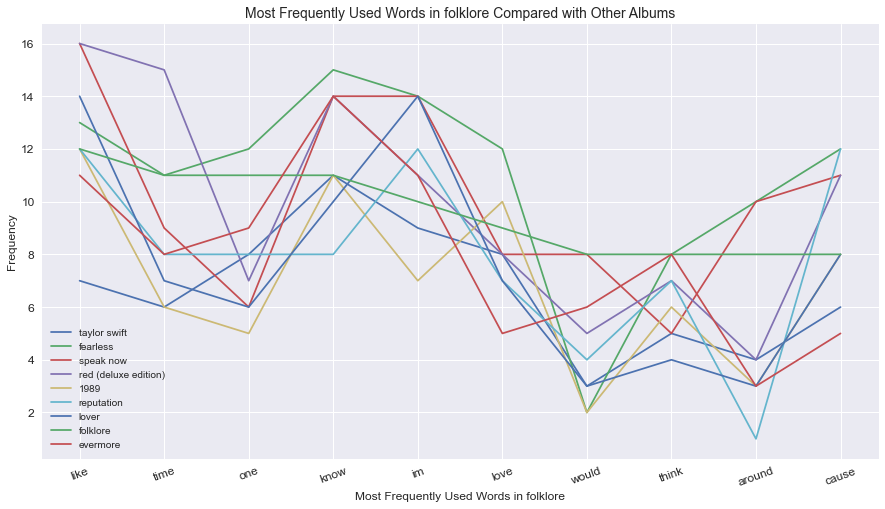

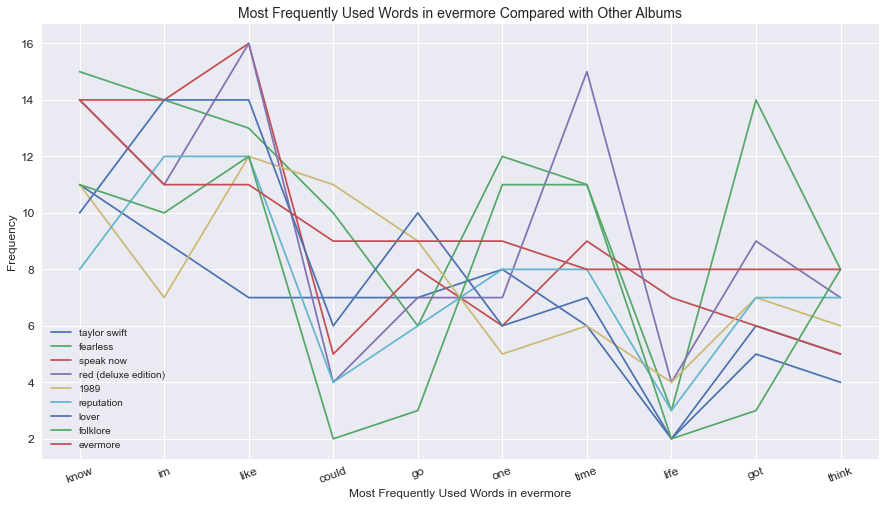

In [78]:
albums = ['taylor swift', 'fearless', 'speak now', 'red (deluxe edition)', '1989', 'reputation', 'lover', 'folklore', 'evermore']
for album in albums:
    plot_freq_words(vect_words, album, 10)